# Bayesian inference for binomial model

Import necessary libraries

In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np
from numpy.random import seed, randint

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

Simulate data

[397]


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 9909.56draws/s] 
The number of effective samples is smaller than 25% for some parameters.


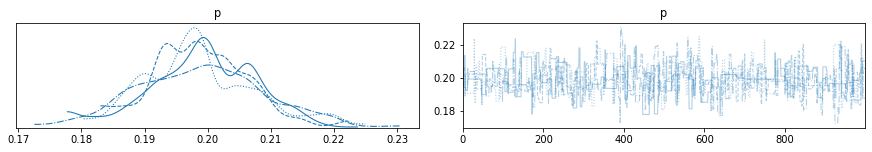

In [44]:
import pymc3 as pm
import matplotlib.pyplot as plt

p_true = 0.2
n = 2000
K = 1

X = np.random.binomial(n + 1, p_true, K)
print( X )

traces = []
with pm.Model() as init_model:
    p = pm.Beta( 'p', alpha=1, beta=1)
    y_obs = pm.Binomial( 'y_obs', p=p, n=n, observed=X )
    # Conjugated posterior is of Beta distribution
    # For arbitrary real alpha and beta, the CDF is in the form of regularized incomplete beta function
    # -> hard to compute analytically
    step = pm.Metropolis() 
    trace = pm.sample(1000, step=step, progressbar=True )
    traces.append(trace)

pm.traceplot( trace )
plt.show()




In [45]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.199,0.009,0.182,0.216,0.0,0.0,496.0,495.0,494.0,393.0,1.03


From this result, we can observe that the mean of sampled p is a good estimation

In [46]:
pm.stats.hpd(trace.p, credible_interval=0.94)

array([0.18214037, 0.21555764])

In [15]:
# Iterative scheme
def from_posterior(param, samples):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 100)
    y = stats.gaussian_kde(samples)(x)

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    return Interpolated(param, x, y)

for _ in range(3):
    X = np.random.binomial(n + 1, p_true, K)
    with pm.Model() as model:
        p = pm.Beta( 'p', alpha=1, beta=1)
        y_obs = pm.Binomial( 'y_obs', p=p, n=n, observed=X )
        step = pm.Metropolis() 
        trace = pm.sample( 1000, step=step, progressbar=True )
        traces.append(trace)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 9331.30draws/s]
The number of effective samples is smaller than 25% for some parameters.


NameError: name 'traces' is not defined